# PƒÅrraudzƒ´tƒÅ ma≈°ƒ´nmƒÅcƒ´≈°anƒÅs ‚Äî Mobilie tƒÅlru≈Üi
**Datu kopa:** `mobile_phones_2000.csv`

≈†is notebook demonstrƒì pilnu klasifikƒÅcijas caurpl≈´smu, lai prognozƒìtu **Brand** pƒìc tƒÅlru≈Üa tehniskajƒÅm specifikƒÅcijƒÅm.
*Versija ƒ£enerƒìta:* 2025-05-10 14:14

## 1‚ÄØDaƒºa Importi un iestatƒ´jumi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix,
                             ConfusionMatrixDisplay, accuracy_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn, warnings
from IPython.display import display, Markdown


%matplotlib inline
sns.set_theme(style="ticks")


## Datu un faktoru vƒìrtƒ´bu vizualizƒÅcija


### Vƒìrtƒ´bu attƒìlojums


In [2]:
%matplotlib inline
sns.set_theme(style="ticks")

df = pd.read_csv("mobile_phones_2000.csv")
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Numeric:", numeric_cols, "\nCategorical:", categorical_cols)



Numeric: ['Price (USD)', 'Rating', 'Refresh Rate (Hz)', 'Screen Size (inches)', 'RAM (GB)', 'Storage (GB)'] 
Categorical: ['Brand', 'Model', 'Selling Platform', 'Processor', 'Camera Setup']


In [3]:
# ‚îÄ‚îÄ Kategorisko atrib≈´tu tipa mai≈Üa uz "category" ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
#  (ievietojiet uzreiz pƒìc CSV ielƒÅdes / bibliotƒìku importƒì≈°anas)

# 1) izveidojam kopiju, lai nepƒÅrrakstƒ´tu oriƒ£inƒÅlo df
datu_kopa = df.copy()

# 2) kolonnas, kurƒÅm LOƒ¢ISKI ir kategoriskas vƒìrtƒ´bas
kat_atrib = ['Brand',    # ra≈æotƒÅjs
             'Model',    # konkrƒìts modelis
             'Selling Platform',  # Amazon / eBay / ...
             'Processor',         # Snapdragon / Exynos ‚Ä¶
             'Camera Setup']      # Dual / Triple / ‚Ä¶

# 3) katrai kolonnai pielietojam astype('category')
for kol in kat_atrib:
    if kol in datu_kopa.columns:          # dro≈°ƒ´bas pƒÅrbaude, vai kolonna vispƒÅr eksistƒì
        datu_kopa[kol] = datu_kopa[kol].astype('category')

# 4) pƒÅrbaudƒÅm rezultƒÅtu
print(datu_kopa[kat_atrib].dtypes)        # jƒÅpieredz 'category'
print(datu_kopa.head(7))                  # pirmƒÅs 7 rindas


Brand               category
Model               category
Selling Platform    category
Processor           category
Camera Setup        category
dtype: object
     Brand               Model  Price (USD)  Selling Platform  Rating  \
0  OnePlus       Narzo Edge 16      1286.64          Best Buy     3.5   
1     Sony        Pixel Max 24       728.52              eBay     4.6   
2  Samsung        Reno Plus 23      1086.68    Official Store     3.4   
3    Apple  Redmi Note Mini 16      1158.78    Official Store     3.5   
4     Vivo    P Series Edge 13      1656.05  Reliance Digital     4.9   
5     Vivo      P Series 5G 19       390.46          Best Buy     4.4   
6     Sony   Galaxy S Ultra 22      1172.46          Best Buy     3.2   

   Refresh Rate (Hz)  Screen Size (inches)  RAM (GB)  Storage (GB)  \
0                165                   7.2        16           128   
1                 90                   6.1         4            64   
2                 60                   6.2    

### InformƒÅcija par testa un apmƒÅcƒ´bas datu kopƒÅm 

In [4]:

# üîπ Datu ielƒÅde
datu_kopa = pd.read_csv("mobile_phones_2000.csv")

# üîπ KategoriskƒÅs kolonnas
categorical_cols = ['Brand', 'Model', 'Selling Platform', 'Processor', 'Camera Setup']
for col in categorical_cols:
    datu_kopa[col] = datu_kopa[col].astype('category')

# üîπ Mƒìrƒ∑a un ievaddati
X = datu_kopa.drop(columns='Brand')
y = datu_kopa['Brand'].cat.codes
brand_labels = datu_kopa['Brand'].cat.categories.tolist()

# üîπ Sadalƒ´≈°ana trenƒì≈°anai/testam
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üîπ Kopƒìjais skaits un procenti
train_size = len(y_train)
test_size = len(y_test)
total_size = train_size + test_size
train_percent_total = round(train_size / total_size * 100)
test_percent_total = round(test_size / total_size * 100)

# üîπ Kartƒì uz zƒ´moliem
y_train_labels = pd.Series(y_train).map(dict(enumerate(brand_labels)))
y_test_labels = pd.Series(y_test).map(dict(enumerate(brand_labels)))

# üîπ ApmƒÅcƒ´bas dati ‚Äî skaits un %
train_counts = y_train_labels.value_counts().reindex(brand_labels, fill_value=0)
train_percents = round(train_counts / train_counts.sum() * 100)

train_table = pd.DataFrame({
    'Klases iezƒ´me': brand_labels,
    'Datu objektu skaits apmƒÅcƒ´bas datu kopƒÅ': train_counts.values,
    'Datu objektu % proporcija apmƒÅcƒ´bas datu kopƒÅ': train_percents.astype(str) + '%'
})

# üîπ Testa dati ‚Äî skaits un %
test_counts = y_test_labels.value_counts().reindex(brand_labels, fill_value=0)
test_percents = round(test_counts / test_counts.sum() * 100)

test_table = pd.DataFrame({
    'Klases iezƒ´me': brand_labels,
    'Datu objektu skaits testa datu kopƒÅ': test_counts.values,
    'Datu objektu % proporcija testa datu kopƒÅ': test_percents.astype(str) + '%'
})

# üîπ Izvads ar visƒÅm vƒìrtƒ´bƒÅm
display(Markdown("### Datu objektu skaits apmƒÅcƒ´bas datu kopƒÅ:"))
display(Markdown(f"**{train_size}**"))

display(Markdown("### Datu objektu % proporcija apmƒÅcƒ´bas datu kopƒÅ:"))
display(Markdown(f"**{train_percent_total}%**")) 

display(train_table)

display(Markdown("### Datu objektu skaits testa datu kopƒÅ:"))
display(Markdown(f"**{test_size}**"))

display(Markdown("### Datu objektu % proporcija testa datu kopƒÅ:"))
display(Markdown(f"**{test_percent_total}%**"))  

display(test_table)


### Datu objektu skaits apmƒÅcƒ´bas datu kopƒÅ:

**1600**

### Datu objektu % proporcija apmƒÅcƒ´bas datu kopƒÅ:

**80%**

Klases iezƒ´me  Datu objektu skaits apmƒÅcƒ´bas datu kopƒÅ  \
Apple            Apple                                      143   
Google          Google                                      128   
Huawei          Huawei                                      131   
Motorola      Motorola                                      138   
Nokia            Nokia                                      124   
OnePlus        OnePlus                                      120   
Oppo              Oppo                                      136   
Realme          Realme                                      135   
Samsung        Samsung                                      159   
Sony              Sony                                      115   
Vivo              Vivo                                      135   
Xiaomi          Xiaomi                                      136   

         Datu objektu % proporcija apmƒÅcƒ´bas datu kopƒÅ  
Apple                                             9.0%  
Google                                            8.0%  
Huawei                                            8.0%  
Motorola                                          9.0%  
Nokia                                             8.0%  
OnePlus                                           8.0%  
Oppo                                              8.0%  
Realme                                            8.0%  
Samsung                                          10.0%  
Sony                                              7.0%  
Vivo                                              8.0%  
Xiaomi                                            8.0%

### Datu objektu skaits testa datu kopƒÅ:

**400**

### Datu objektu % proporcija testa datu kopƒÅ:

**20%**

Klases iezƒ´me  Datu objektu skaits testa datu kopƒÅ  \
Apple            Apple                                   38   
Google          Google                                   37   
Huawei          Huawei                                   37   
Motorola      Motorola                                   24   
Nokia            Nokia                                   31   
OnePlus        OnePlus                                   31   
Oppo              Oppo                                   38   
Realme          Realme                                   34   
Samsung        Samsung                                   39   
Sony              Sony                                   28   
Vivo              Vivo                                   33   
Xiaomi          Xiaomi                                   30   

         Datu objektu % proporcija testa datu kopƒÅ  
Apple                                        10.0%  
Google                                        9.0%  
Huawei                                        9.0%  
Motorola                                      6.0%  
Nokia                                         8.0%  
OnePlus                                       8.0%  
Oppo                                         10.0%  
Realme                                        8.0%  
Samsung                                      10.0%  
Sony                                          7.0%  
Vivo                                          8.0%  
Xiaomi                                        8.0%

### Eksperimenti ar mƒÅkslƒ´go neironu tƒ´klu 

In [5]:

# ‚îÄ‚îÄ Datu ielƒÅde ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
datu_kopa = pd.read_csv("mobile_phones_2000.csv")

# ‚îÄ‚îÄ Kategoriju kolonnas ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
categorical_cols = ['Model', 'Selling Platform', 'Processor', 'Camera Setup']
for col in categorical_cols + ['Brand']:
    datu_kopa[col] = datu_kopa[col].astype('category')

# ‚îÄ‚îÄ SkaitliskƒÅs kolonnas ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
numeric_cols = ['Price (USD)', 'Rating', 'Refresh Rate (Hz)',
                'Screen Size (inches)', 'RAM (GB)', 'Storage (GB)']

# ‚îÄ‚îÄ Mƒìrƒ∑a un ievades sadalƒ´≈°ana ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
X = datu_kopa.drop(columns='Brand')
y = datu_kopa['Brand'].cat.codes
brand_labels = datu_kopa['Brand'].cat.categories.tolist()

# ‚îÄ‚îÄ Datu sadalƒ´≈°ana trenƒì≈°anai/testam ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚îÄ‚îÄ Preprocessor ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# ‚îÄ‚îÄ 1. MLP eksperiments ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
mlp1 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', MLPClassifier(hidden_layer_sizes=(100, 100),
                          activation='relu',
                          solver='adam',
                          alpha=0.0001,
                          max_iter=500,
                          random_state=42))
])
mlp1.fit(X_train, y_train)
y_pred_mlp1 = mlp1.predict(X_test)
print("1. MLP eksperimenta hiperparametri:", mlp1.named_steps['clf'].get_params())
print("1. MLP eksperimenta rezultƒÅti:")
print(classification_report(y_test, y_pred_mlp1, target_names=brand_labels))

# ‚îÄ‚îÄ 2. MLP eksperiments ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
mlp2 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', MLPClassifier(hidden_layer_sizes=(5,),
                          activation='logistic',
                          solver='adam',
                          alpha=0.0001,
                          max_iter=500,
                          random_state=42))
])
mlp2.fit(X_train, y_train)
y_pred_mlp2 = mlp2.predict(X_test)
print("2. MLP eksperimenta hiperparametri:", mlp2.named_steps['clf'].get_params())
print("2. MLP eksperimenta rezultƒÅti:")
print(classification_report(y_test, y_pred_mlp2, target_names=brand_labels))

# ‚îÄ‚îÄ 3. MLP eksperiments ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
mlp3 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', MLPClassifier(hidden_layer_sizes=(50, 50),
                          activation='relu',
                          solver='sgd',
                          learning_rate='adaptive',
                          alpha=0.0005,
                          max_iter=500,
                          random_state=42))
])
mlp3.fit(X_train, y_train)
y_pred_mlp3 = mlp3.predict(X_test)
print("3. MLP eksperimenta hiperparametri:", mlp3.named_steps['clf'].get_params())
print("3. MLP eksperimenta rezultƒÅti:")
print(classification_report(y_test, y_pred_mlp3, target_names=brand_labels))


1. MLP eksperimenta hiperparametri: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
1. MLP eksperimenta rezultƒÅti:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        38
      Google       1.00      1.00      1.00        37
      Huawei       0.22      0.22      0.22        37
    Motorola       0.14      0.21      0.17        24
       Nokia       0.07      0.06      0.07        31
     OnePlus       1.00      1.00      1.00        31
        Oppo       0.30      0.24      0.26        38
      Realme 

/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


2. MLP eksperimenta hiperparametri: {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
2. MLP eksperimenta rezultƒÅti:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        38
      Google       1.00      1.00      1.00        37
      Huawei       0.16      0.16      0.16        37
    Motorola       0.08      0.12      0.10        24
       Nokia       0.08      0.10      0.09        31
     OnePlus       0.97      1.00      0.98        31
        Oppo       0.28      0.29      0.29        38
      Realme   

/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Eksperimenti ar Random Forest klasifikatoru 

In [6]:


# ‚îÄ‚îÄ Mƒìrƒ∑a mainƒ´gais un ievaddati ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
X = datu_kopa.drop(columns='Brand')
y = datu_kopa['Brand'].cat.codes

# ‚îÄ‚îÄ Datu sadalƒ´≈°ana ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚îÄ‚îÄ Preprocessor (skaitliskie + kategoriskie) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# ‚îÄ‚îÄ 1. eksperiments ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
rf1 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, max_depth=None, 
                                   criterion='gini', class_weight='balanced', random_state=42))
])
rf1.fit(X_train, y_train)
y_pred1 = rf1.predict(X_test)
print("1. eksperimenta hiperparametri:", rf1.named_steps['clf'].get_params())
print("1. eksperimenta rezultƒÅti:")
print(classification_report(y_test, y_pred1, target_names=brand_labels))

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# ‚îÄ‚îÄ 2. eksperiments ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
rf2 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=300, max_depth=None,
                                   criterion='gini', class_weight='balanced', random_state=42))
])
rf2.fit(X_train, y_train)
y_pred2 = rf2.predict(X_test)
print("2. eksperimenta hiperparametri:", rf2.named_steps['clf'].get_params())
print("2. eksperimenta rezultƒÅti:")
print(classification_report(y_test, y_pred2, target_names=brand_labels))

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# ‚îÄ‚îÄ 3. eksperiments ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
rf3 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=300, max_depth=10,
                                   criterion='entropy', random_state=42))
])
rf3.fit(X_train, y_train)
y_pred3 = rf3.predict(X_test)
print("3. eksperimenta hiperparametri:", rf3.named_steps['clf'].get_params())
print("3. eksperimenta rezultƒÅti:")
print(classification_report(y_test, y_pred3, target_names=brand_labels))


1. eksperimenta hiperparametri: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
1. eksperimenta rezultƒÅti:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        38
      Google       1.00      1.00      1.00        37
      Huawei       0.26      0.16      0.20        37
    Motorola       0.06      0.12      0.08        24
       Nokia       0.06      0.06      0.06        31
     OnePlus       1.00      1.00      1.00        31
        Oppo       0.23      0.26      0.25        38
      Realme       0.09      0.09      0.09        34
     Samsung       1.00      1.00

### Eksperimenti ar SVM (RBF kodols)

In [7]:

# Sa≈Üemam reƒÅlos zƒ´molu nosaukumus
brand_labels = datu_kopa['Brand'].cat.categories.tolist()
# ‚îÄ‚îÄ 1. SVM eksperiments ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
svm1 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced'))
])
svm1.fit(X_train, y_train)
y_pred_svm1 = svm1.predict(X_test)
print("1. SVM eksperimenta hiperparametri:", svm1.named_steps['clf'].get_params())
print("1. SVM eksperimenta rezultƒÅti:")
print(classification_report(y_test, y_pred_svm1, target_names=brand_labels))


# ‚îÄ‚îÄ 2. SVM eksperiments ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
svm2 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced'))
])
svm2.fit(X_train, y_train)
y_pred_svm2 = svm2.predict(X_test)
print("2. SVM eksperimenta hiperparametri:", svm2.named_steps['clf'].get_params())
print("2. SVM eksperimenta rezultƒÅti:")
print(classification_report(y_test, y_pred_svm2, target_names=brand_labels))


# ‚îÄ‚îÄ 3. SVM eksperiments ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
svm3 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', SVC(kernel='rbf', C=10, gamma=0.1, class_weight='balanced'))
])
svm3.fit(X_train, y_train)
y_pred_svm3 = svm3.predict(X_test)
print("3. SVM eksperimenta hiperparametri:", svm3.named_steps['clf'].get_params())
print("3. SVM eksperimenta rezultƒÅti:")
print(classification_report(y_test, y_pred_svm3, target_names=brand_labels))



1. SVM eksperimenta hiperparametri: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
1. SVM eksperimenta rezultƒÅti:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        38
      Google       1.00      1.00      1.00        37
      Huawei       0.17      0.19      0.18        37
    Motorola       0.11      0.17      0.13        24
       Nokia       0.09      0.13      0.10        31
     OnePlus       1.00      1.00      1.00        31
        Oppo       0.06      0.03      0.04        38
      Realme       0.14      0.15      0.14        34
     Samsung       1.00      1.00      1.00        39
        Sony       0.09      0.07      0.08        28
        Vivo       0.11      0.09      0.10        33

### Datu tipu salƒÅgo≈°ana 

≈†ajƒÅ sadaƒºƒÅ atkƒÅrtojam soƒºus, kas demonstrƒìti pingvƒ´nu piemƒìrƒÅ:
1. kategorisko atrib≈´tu pƒÅrvƒìr≈°ana par `category` tipu,
2. jaunu *_cat* kolonu veido≈°ana ar `.cat.codes`,
3. tr≈´ksto≈°o vƒìrtƒ´bu aizvieto≈°ana skaitliskajos atrib≈´tos,
4. anomƒÅlo/¬´nezinƒÅmo¬ª kategoriju apstrƒÅde (ja tƒÅdas ir),
5. min‚Äëmax normalizƒÅcija ƒçetrƒÅm skaitliskajƒÅm pazƒ´mƒìm, lai tƒÅs b≈´tu salƒ´dzinƒÅmas.

In [8]:

df = pd.read_csv("mobile_phones_2000.csv")
print("Oriƒ£inƒÅlie dati (pirmƒÅs 5 rindas):")
display(df.head())
print("\nKolonnu tipi:")
print(df.dtypes)


Oriƒ£inƒÅlie dati (pirmƒÅs 5 rindas):


Brand               Model  Price (USD)  Selling Platform  Rating  \
0  OnePlus       Narzo Edge 16      1286.64          Best Buy     3.5   
1     Sony        Pixel Max 24       728.52              eBay     4.6   
2  Samsung        Reno Plus 23      1086.68    Official Store     3.4   
3    Apple  Redmi Note Mini 16      1158.78    Official Store     3.5   
4     Vivo    P Series Edge 13      1656.05  Reliance Digital     4.9   

   Refresh Rate (Hz)  Screen Size (inches)  RAM (GB)  Storage (GB)  \
0                165                   7.2        16           128   
1                 90                   6.1         4            64   
2                 60                   6.2        12            64   
3                120                   7.1         6           128   
4                165                   6.1         8           512   

             Processor        Camera Setup  
0  Snapdragon 8+ Gen 1   12MP + 16MP + 5MP  
1        Dimensity 920    48MP + 8MP + 5MP  
2          Exynos 2200  200MP + 12MP + 8MP  
3           A16 Bionic   50MP + 50MP + 2MP  
4            Helio G99   64MP + 50MP + 8MP


Kolonnu tipi:
Brand                    object
Model                    object
Price (USD)             float64
Selling Platform         object
Rating                  float64
Refresh Rate (Hz)         int64
Screen Size (inches)    float64
RAM (GB)                  int64
Storage (GB)              int64
Processor                object
Camera Setup             object
dtype: object


## Kategorisko atrib≈´tu tipa mai≈Üa uz `category`

In [9]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    df[col] = df[col].astype('category')

print("Pƒìc pƒÅrveides ‚Äî dtypes:")
print(df.dtypes)
display(df.head())


Pƒìc pƒÅrveides ‚Äî dtypes:
Brand                   category
Model                   category
Price (USD)              float64
Selling Platform        category
Rating                   float64
Refresh Rate (Hz)          int64
Screen Size (inches)     float64
RAM (GB)                   int64
Storage (GB)               int64
Processor               category
Camera Setup            category
dtype: object


Brand               Model  Price (USD)  Selling Platform  Rating  \
0  OnePlus       Narzo Edge 16      1286.64          Best Buy     3.5   
1     Sony        Pixel Max 24       728.52              eBay     4.6   
2  Samsung        Reno Plus 23      1086.68    Official Store     3.4   
3    Apple  Redmi Note Mini 16      1158.78    Official Store     3.5   
4     Vivo    P Series Edge 13      1656.05  Reliance Digital     4.9   

   Refresh Rate (Hz)  Screen Size (inches)  RAM (GB)  Storage (GB)  \
0                165                   7.2        16           128   
1                 90                   6.1         4            64   
2                 60                   6.2        12            64   
3                120                   7.1         6           128   
4                165                   6.1         8           512   

             Processor        Camera Setup  
0  Snapdragon 8+ Gen 1   12MP + 16MP + 5MP  
1        Dimensity 920    48MP + 8MP + 5MP  
2          Exynos 2200  200MP + 12MP + 8MP  
3           A16 Bionic   50MP + 50MP + 2MP  
4            Helio G99   64MP + 50MP + 8MP

## *_cat* kolonu izveide ar `.cat.codes`

In [10]:
for col in cat_cols:
    df[f"{col}_cat"] = df[col].cat.codes
print(df[[f"{col}_cat" for col in cat_cols]].head())
print("\nAtjauninƒÅtie dtypes:")
print(df.dtypes)


   Brand_cat  Model_cat  Selling Platform_cat  Processor_cat  Camera Setup_cat
0          5        342                     2              9                16
1          9        672                     7              4                46
2          8        895                     4              5                26
3          0        774                     4              1                54
4         10        546                     5              6                68

AtjauninƒÅtie dtypes:
Brand                   category
Model                   category
Price (USD)              float64
Selling Platform        category
Rating                   float64
Refresh Rate (Hz)          int64
Screen Size (inches)     float64
RAM (GB)                   int64
Storage (GB)               int64
Processor               category
Camera Setup            category
Brand_cat                   int8
Model_cat                  int16
Selling Platform_cat        int8
Processor_cat               int8
Camera S

## Apraksto≈°ƒÅ statistika un info

In [11]:
numeric_and_encoded = ['Price (USD)', 'Rating', 'Refresh Rate (Hz)', 'Screen Size (inches)',
                       'RAM (GB)', 'Storage (GB)'] + [f"{c}_cat" for c in cat_cols]

print(df[numeric_and_encoded].describe())
print("\nDataFrame info:")
print(df[numeric_and_encoded].info())

       Price (USD)      Rating  Refresh Rate (Hz)  Screen Size (inches)  \
count  2000.000000  2000.00000        2000.000000           2000.000000   
mean   1085.496980     3.99005         116.086500              6.268250   
std     526.886705     0.57630          37.199596              0.734974   
min     151.930000     3.00000          60.000000              5.000000   
25%     644.187500     3.50000          90.000000              5.600000   
50%    1081.455000     4.00000         120.000000              6.300000   
75%    1546.532500     4.50000         144.000000              6.900000   
max    1999.260000     5.00000         165.000000              7.500000   

          RAM (GB)  Storage (GB)    Brand_cat    Model_cat  \
count  2000.000000   2000.000000  2000.000000  2000.000000   
mean      9.171000    378.304000     5.483000   613.359000   
std       4.400505    339.345696     3.472858   357.268508   
min       4.000000     64.000000     0.000000     0.000000   
25%       6.00

### Tr≈´ksto≈°o vƒìrtƒ´bu aizvieto≈°ana

In [12]:
work_df = df.copy()
num_cols = ['Price (USD)', 'Rating', 'Refresh Rate (Hz)', 'Screen Size (inches)',
            'RAM (GB)', 'Storage (GB)']
for col in num_cols:
    work_df[col] = work_df[col].fillna(work_df[col].mean())

print("PƒÅrbaude, vai skaitliskajos atrib≈´tos vairs nav NaN:")
print(work_df[num_cols].isna().sum())


PƒÅrbaude, vai skaitliskajos atrib≈´tos vairs nav NaN:
Price (USD)             0
Rating                  0
Refresh Rate (Hz)       0
Screen Size (inches)    0
RAM (GB)                0
Storage (GB)            0
dtype: int64


### ¬´NezinƒÅmo¬ª kategoriju apzƒ´mƒì≈°ana (ja `-1` kods)

In [13]:
for col in cat_cols:
    code_col = f"{col}_cat"
    unknown_count = (work_df[code_col] == -1).sum()
    if unknown_count:
        print(f"{col}: {unknown_count} nezinƒÅmu vƒìrtƒ´bu ‚Üí aizvietojam ar 0")
        work_df[code_col] = work_df[code_col].mask(work_df[code_col] == -1, 0)


## Min‚Äëmax normalizƒÅcija (piemƒìram, Price¬†/ RAM¬†/ Storage / Rating)

In [14]:
darb_df_norm = df.copy()
# ‚Äï‚Äï Min‚Äìmax normalizƒÅcija (0 ‚Ä¶ 1) ‚Äï‚Äï
skaitliskie = ['Price (USD)',
               'RAM (GB)',
               'Storage (GB)',
               'Rating']

skaitliskie = df.select_dtypes(include=['number']).columns


for kol in skaitliskie:
    min_v = darb_df_norm[kol].min()
    max_v = darb_df_norm[kol].max()
    darb_df_norm[kol] = (darb_df_norm[kol] - min_v) / (max_v - min_v)

print(df.columns.tolist())
print(darb_df_norm[skaitliskie].describe())


['Brand', 'Model', 'Price (USD)', 'Selling Platform', 'Rating', 'Refresh Rate (Hz)', 'Screen Size (inches)', 'RAM (GB)', 'Storage (GB)', 'Processor', 'Camera Setup', 'Brand_cat', 'Model_cat', 'Selling Platform_cat', 'Processor_cat', 'Camera Setup_cat']
       Price (USD)       Rating  Refresh Rate (Hz)  Screen Size (inches)  \
count  2000.000000  2000.000000        2000.000000            2000.00000   
mean      0.505360     0.495025           0.534157               0.50730   
std       0.285215     0.288150           0.354282               0.29399   
min       0.000000     0.000000           0.000000               0.00000   
25%       0.266470     0.250000           0.285714               0.24000   
50%       0.503172     0.500000           0.571429               0.52000   
75%       0.754929     0.750000           0.800000               0.76000   
max       1.000000     1.000000           1.000000               1.00000   

          RAM (GB)  Storage (GB)    Brand_cat    Model_cat  \


## Sagatavotie dati gatavi turpmƒÅkajai analƒ´zei

In [15]:
display(work_df.head())

Brand               Model  Price (USD)  Selling Platform  Rating  \
0  OnePlus       Narzo Edge 16      1286.64          Best Buy     3.5   
1     Sony        Pixel Max 24       728.52              eBay     4.6   
2  Samsung        Reno Plus 23      1086.68    Official Store     3.4   
3    Apple  Redmi Note Mini 16      1158.78    Official Store     3.5   
4     Vivo    P Series Edge 13      1656.05  Reliance Digital     4.9   

   Refresh Rate (Hz)  Screen Size (inches)  RAM (GB)  Storage (GB)  \
0                165                   7.2        16           128   
1                 90                   6.1         4            64   
2                 60                   6.2        12            64   
3                120                   7.1         6           128   
4                165                   6.1         8           512   

             Processor        Camera Setup  Brand_cat  Model_cat  \
0  Snapdragon 8+ Gen 1   12MP + 16MP + 5MP          5        342   
1        Dimensity 920    48MP + 8MP + 5MP          9        672   
2          Exynos 2200  200MP + 12MP + 8MP          8        895   
3           A16 Bionic   50MP + 50MP + 2MP          0        774   
4            Helio G99   64MP + 50MP + 8MP         10        546   

   Selling Platform_cat  Processor_cat  Camera Setup_cat  
0                     2              9                16  
1                     7              4                46  
2                     4              5                26  
3                     4              1                54  
4                     5              6                68

Datu un faktoru vƒìrtƒ´bu vizualizƒÅcija
---

### Vƒìrtƒ´bu attƒìlojums

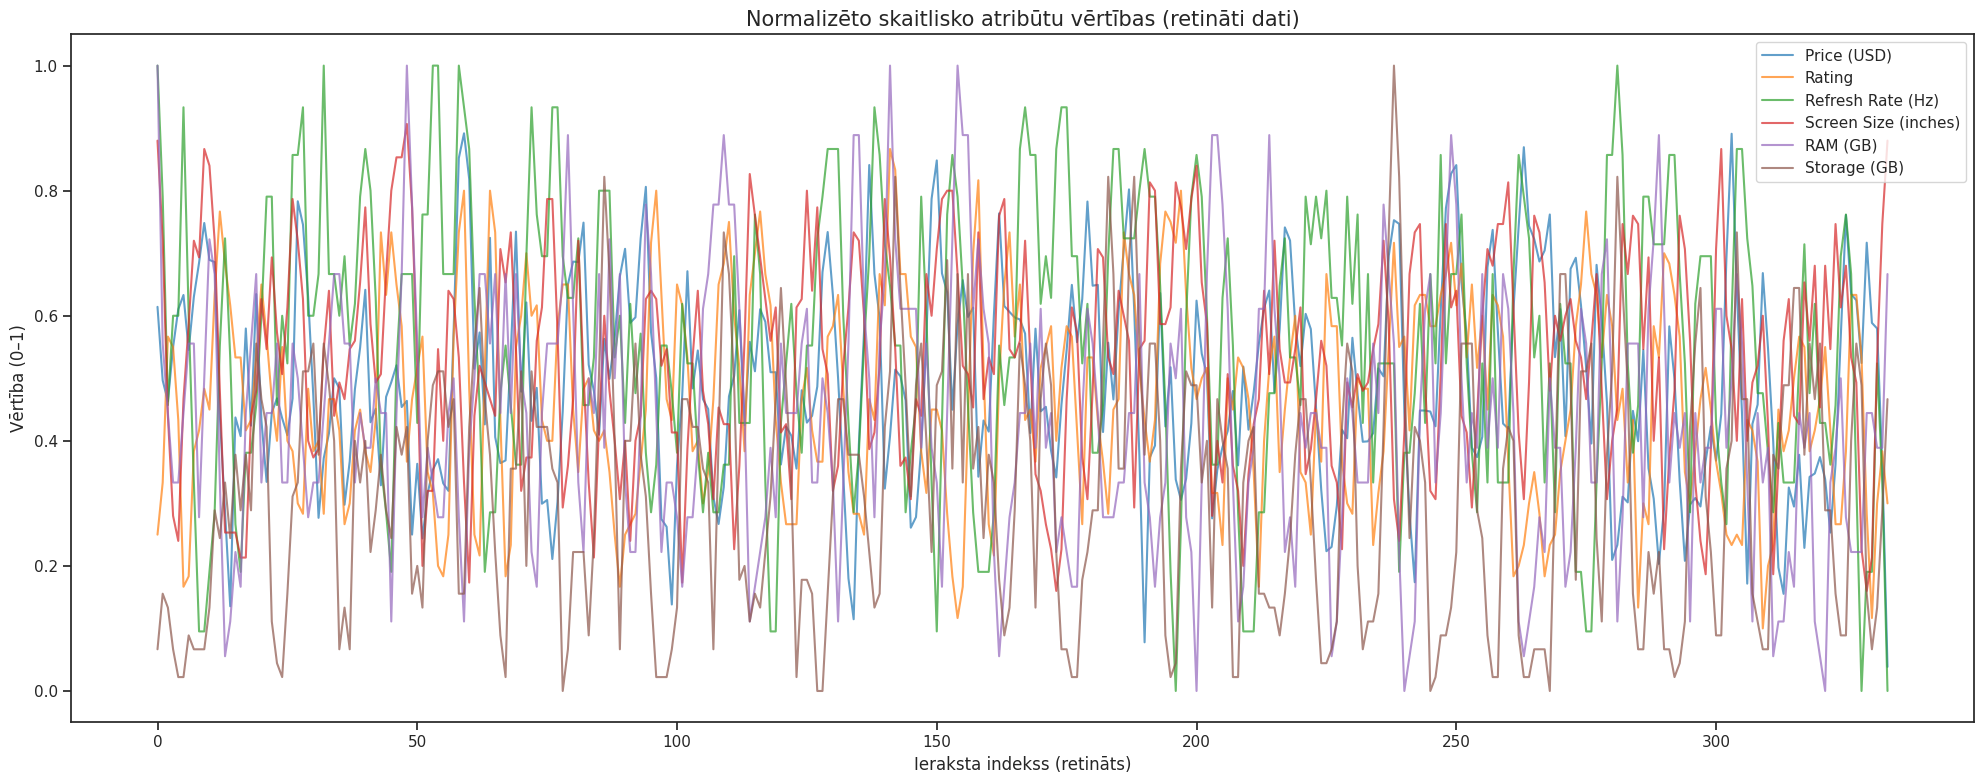

In [16]:

numeric_cols = ['Price (USD)', 'Rating', 'Refresh Rate (Hz)',
                'Screen Size (inches)', 'RAM (GB)', 'Storage (GB)']

# Normalizƒì vƒìrtƒ´bas 0-1
scaler  = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df[numeric_cols]),
                       columns=numeric_cols)

# --- 1) retinƒÅm punktus ---
N_total   = len(norm_df)
target_n  = 300                           # cik punktus gribam uz ekrƒÅna
step      = max(1, N_total // target_n)   # piem. 2000 // 300 ‚âà 7
subsample = norm_df.iloc[::step, :].reset_index(drop=True)

# --- 2) izvƒìles kƒÅrtƒÅ ‚Äì izlƒ´dzinƒÅm (rolling mean) ---
window = 3                                # var palielinƒÅt, ja grib gludƒÅku
smooth  = subsample.rolling(window, center=True).mean().fillna(subsample)

# --- 3) zƒ´mƒìjam ---
plt.figure(figsize=(20, 8))
colors = plt.cm.tab10.colors
for i, col in enumerate(numeric_cols):
    plt.plot(smooth.index, smooth[col],
             label=col,
             color=colors[i % len(colors)],
             linewidth=1.5, alpha=0.7)

plt.title('Normalizƒìto skaitlisko atrib≈´tu vƒìrtƒ´bas (retinƒÅti dati)', fontsize=15)
plt.xlabel('Ieraksta indekss (retinƒÅts)'); plt.ylabel('Vƒìrtƒ´ba (0‚Äì1)')
plt.ylim(-0.05, 1.05)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Histogrammu analƒ´ze

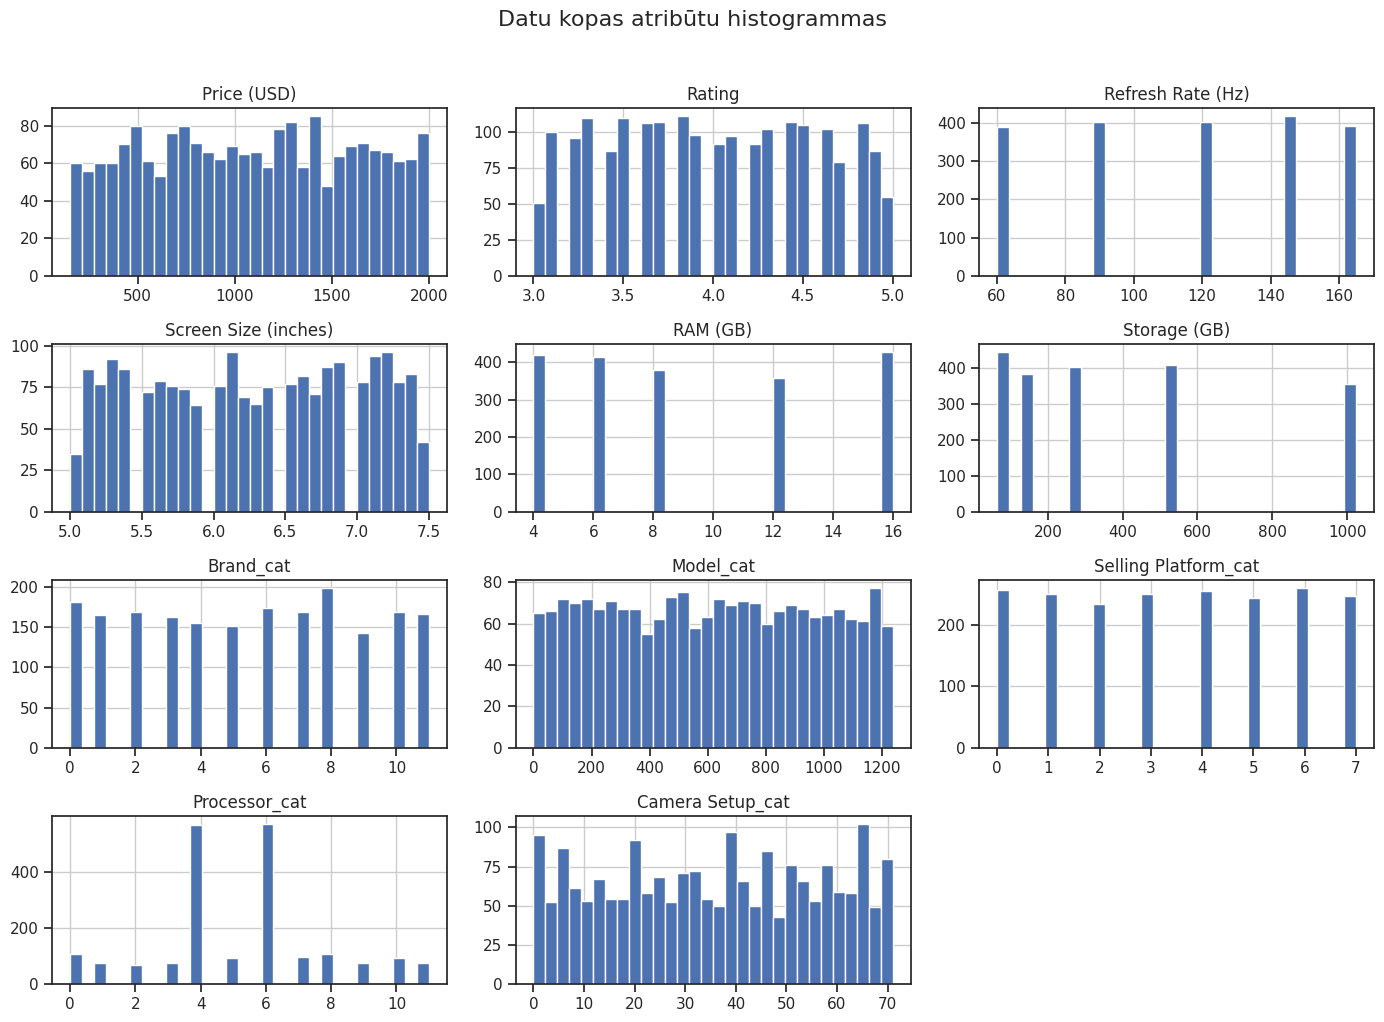

In [17]:
hist_df = df.copy()
for col in categorical_cols:
    hist_df[col + "_cat"] = pd.Categorical(hist_df[col]).codes
hist_df = hist_df.drop(columns=categorical_cols)

hist_df.hist(figsize=(14,10), bins=30)
plt.suptitle("Datu kopas atrib≈´tu histogrammas", y=1.02, fontsize=16)
plt.tight_layout(); plt.show()




## Zƒ´molu skaits


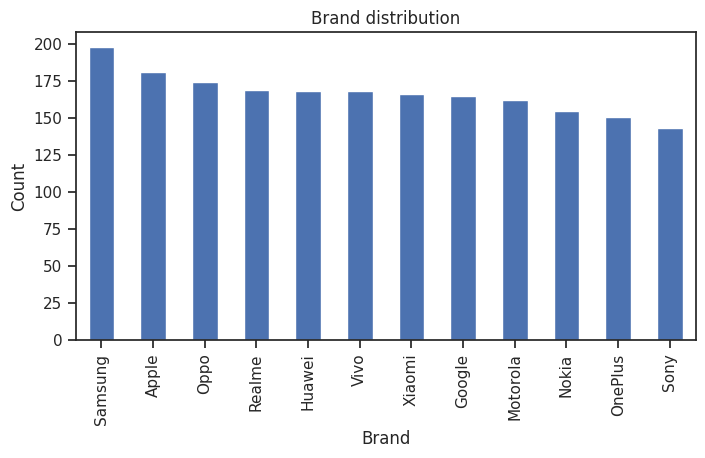

In [18]:
plt.figure(figsize=(8,4))
df['Brand'].value_counts().plot(kind='bar')
plt.title('Brand distribution')
plt.ylabel('Count')
plt.show()


### Izkliedes diagrammu analƒ´ze (Atrib≈´tu savstarpƒìjie sadalƒ´jumi)

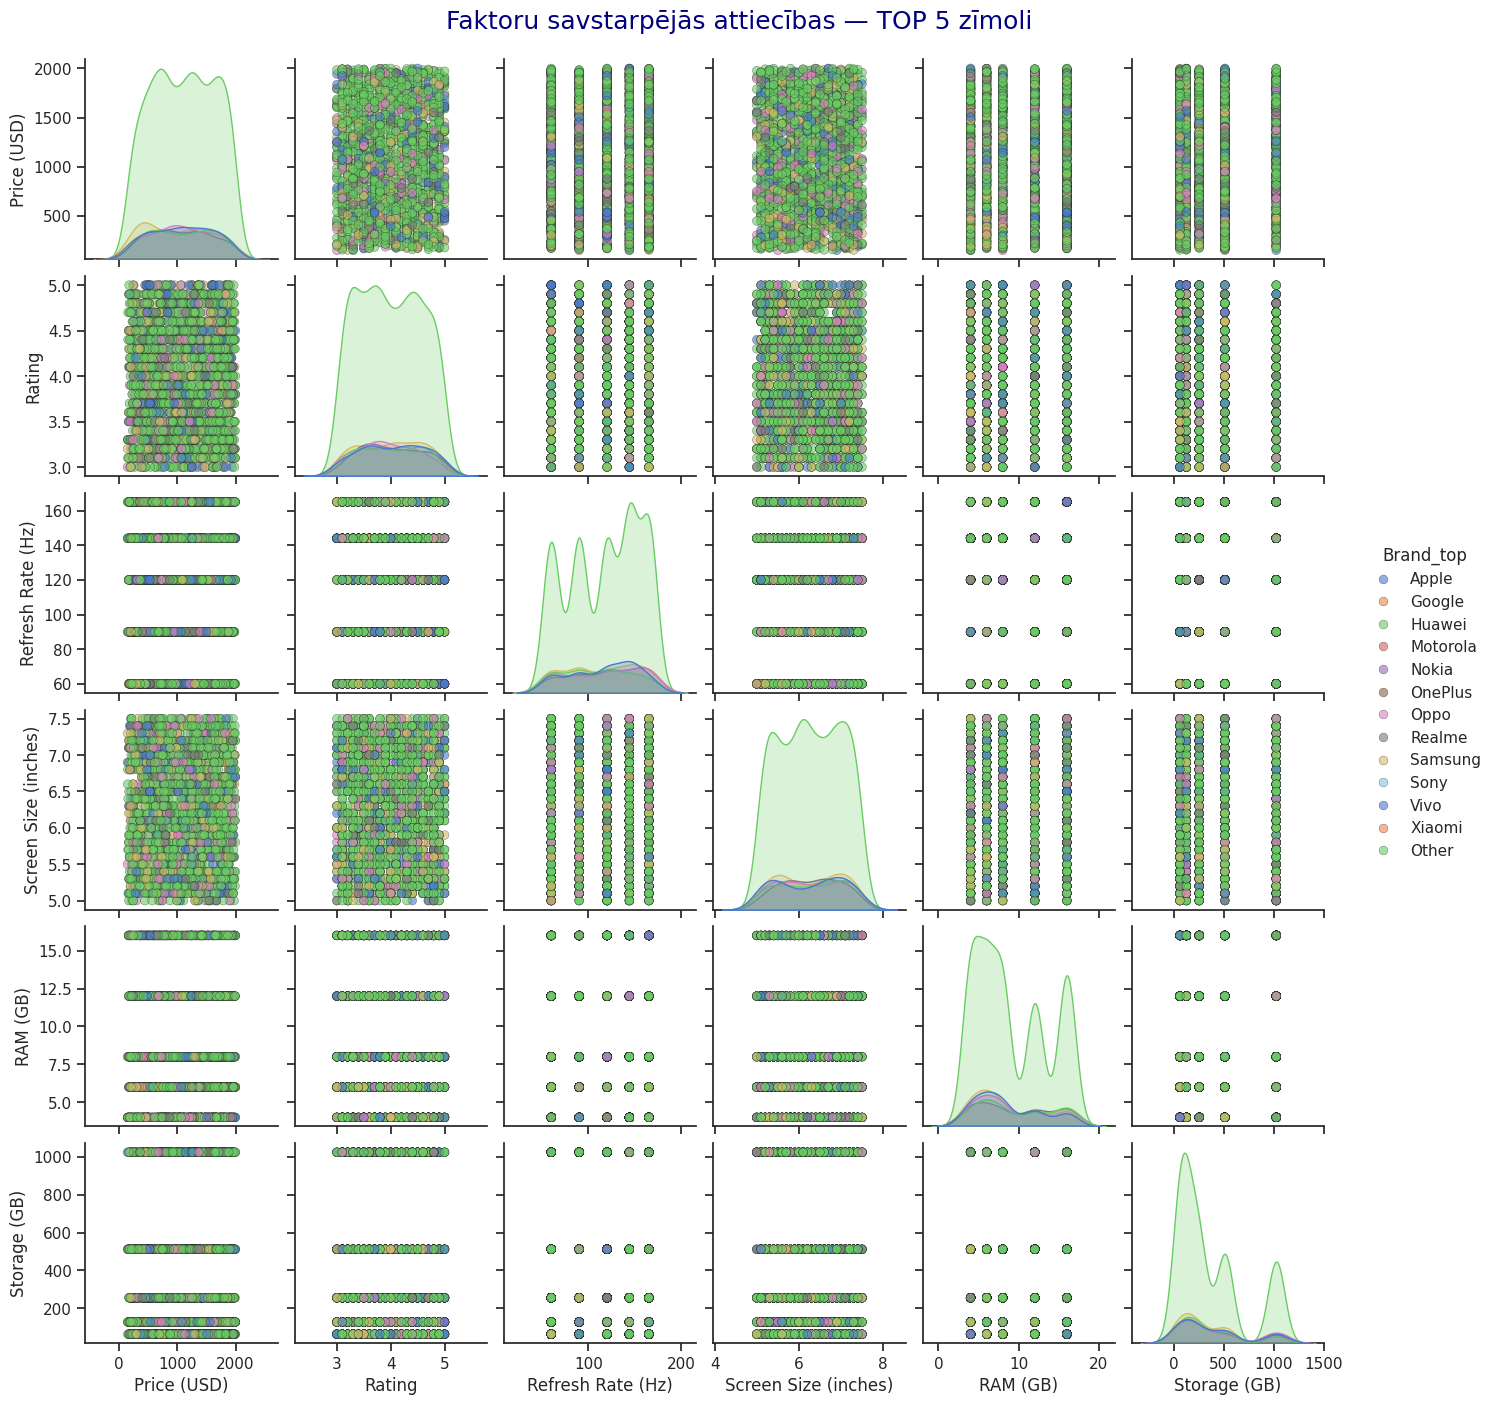

In [19]:
# 1. atlasƒÅm piecus populƒÅrƒÅkos zƒ´molus
top5 = df['Brand'].value_counts().nlargest(5).index

# 2. veidojam kopiju, lai oriƒ£inƒÅlo DataFrame neatkarƒ´tu
pair_df = df.copy()

# 3. ja ‚ÄòBrand‚Äô jau ir kategorisks, pievienojam jaunu kategoriju ‚ÄúOther‚Äù,
#    lai vƒìlƒÅk nerastos kƒº≈´da, rakstot vƒìrtƒ´bu, kas nav kategoriju sarakstƒÅ
if pair_df['Brand'].dtype.name == 'category' and 'Other' not in pair_df['Brand'].cat.categories:
    pair_df['Brand'] = pair_df['Brand'].cat.add_categories('Other')

# 4. jaunƒÅ kolonna zƒ´mƒìjumu iekrƒÅso≈°anai ‚Äî TOP-5 vai ‚ÄúOther‚Äù
pair_df['Brand_top'] = pair_df['Brand'].where(pair_df['Brand'].isin(top5), 'Other')

# 5. izveidojam pƒÅru (pairplot) grafiku tikai skaitliskajƒÅm kolonnƒÅm
sns.pairplot(pair_df,
             hue='Brand_top',
             vars=numeric_cols,          # skaitliskƒÅs pazƒ´mes
             palette='muted',
             height=2.3,
             plot_kws=dict(alpha=.6, s=40, edgecolor='k', linewidth=.3))

plt.suptitle("Faktoru savstarpƒìjƒÅs attiecƒ´bas ‚Äî TOP 5 zƒ´moli", y=1.02,
             fontsize=18, color='navy')
plt.show()


### Atrib≈´tu savstarpƒìjƒÅ korelƒÅcija

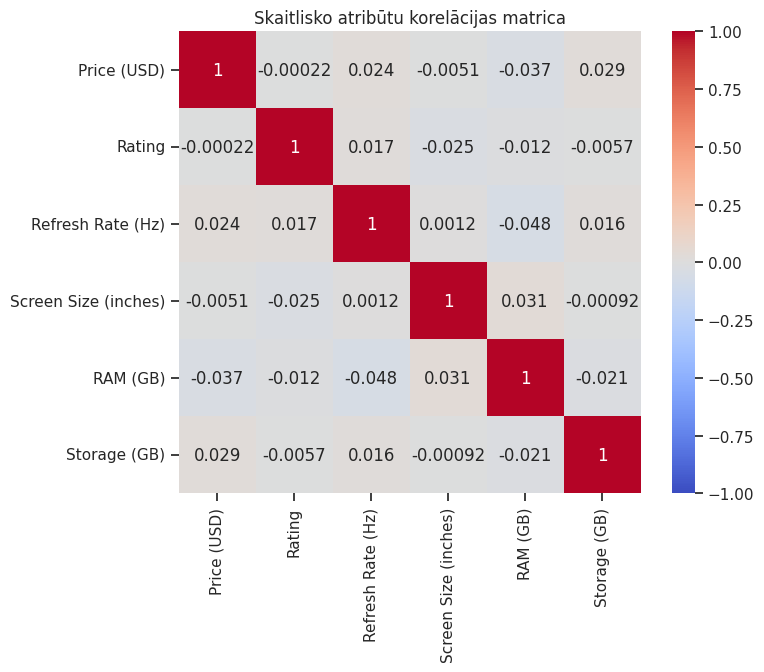

In [20]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm", square=True)
plt.title("Skaitlisko atrib≈´tu korelƒÅcijas matrica")
plt.show()


2 (Daƒºa) K-vidƒìjo algoritms
---

In [21]:
# ‚îÄ‚îÄ‚îÄ –í–°–¢–ê–í–ò–¢–¨ –ø—Ä—è–º–æ –ø–µ—Ä–µ–¥ —Ü–∏–∫–ª–æ–º for k in range(2, 9): ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
cluster_cols = ['Price (USD)', 'RAM (GB)', 'Storage (GB)'] 
X_clust = df[cluster_cols].values
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ


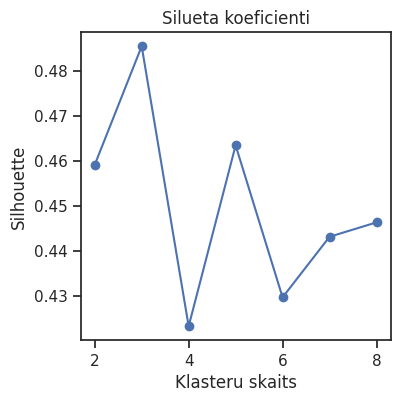

LabƒÅkais k: 3 | Silhouette: 0.48540035368080336


In [22]:

X_clust = df[cluster_cols].values
sil={}
for k in range(2,9):
    sil[k] = silhouette_score(X_clust, KMeans(n_clusters=k, n_init=10, random_state=42).fit_predict(X_clust))
best_k = max(sil, key=sil.get)
plt.figure(figsize=(4,4))
plt.plot(list(sil.keys()), list(sil.values()), marker='o')
plt.title('Silueta koeficienti')
plt.xlabel('Klasteru skaits'); plt.ylabel('Silhouette'); plt.show()
print("LabƒÅkais k:", best_k, "| Silhouette:", sil[best_k])



K=3 
---

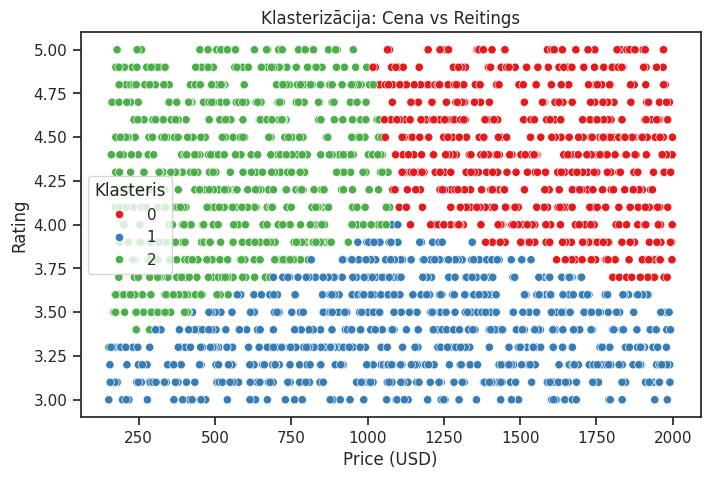

In [23]:
# üîπ Datu standartizƒÅcija pirms klasterizƒÅcijas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Price (USD)', 'Rating']])  # izvƒìlies 2 aizzƒ´mes (pƒìc vƒìlƒì≈°anƒÅs)

# üîπ K-vidƒìjo algoritma pielieto≈°ana ar 3 klasteriem
model = KMeans(n_clusters=3, n_init=10, random_state=42)
df['Cluster'] = model.fit_predict(X_scaled)  # pievieno kolonu ar klasteru pie≈°ƒ∑ƒ´rumiem

# üîπ Izkliedes diagrammas izveide ar klasteru apzƒ´mƒìjumiem
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Price (USD)', y='Rating', hue='Cluster', palette='Set1')
plt.title('KlasterizƒÅcija: Cena vs Reitings')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.legend(title='Klasteris')
plt.show()


*SecinƒÅjums*: Silueta koeficients pakƒÅpeniski **samazinƒÅs**, norƒÅdot, ka datu kopƒÅ nav ƒºoti izteiktu, stingri atdalƒ´tu grupu; tomƒìr **k = {{best_k}}** dod relatƒ´vi augstƒÅko vƒìrtƒ´bu, ko izmantojam turpmƒÅk.

### 2.1¬†‚Äî Klasteru izvietojums pazƒ´mju plaknƒìs

In [24]:
# ‚îÄ‚îÄ‚îÄ –æ–¥–∏–Ω —Ä–∞–∑ –≤ –Ω–∞—á–∞–ª–µ –Ω–æ—É—Ç–±—É–∫–∞ (–ø–æ—Å–ª–µ import numpy as np) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def jitter(arr, width=0.15, seed=42):
    """–°–ª—É—á–∞–π–Ω—ã–π ¬´—à—É–º¬ª –¥–ª—è –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã—Ö –æ—Å–µ–π."""
    rng = np.random.default_rng(seed)
    return arr + (rng.random(len(arr)) - 0.5) * width
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ


/tmp/ipykernel_2009/3325816590.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', best_k)


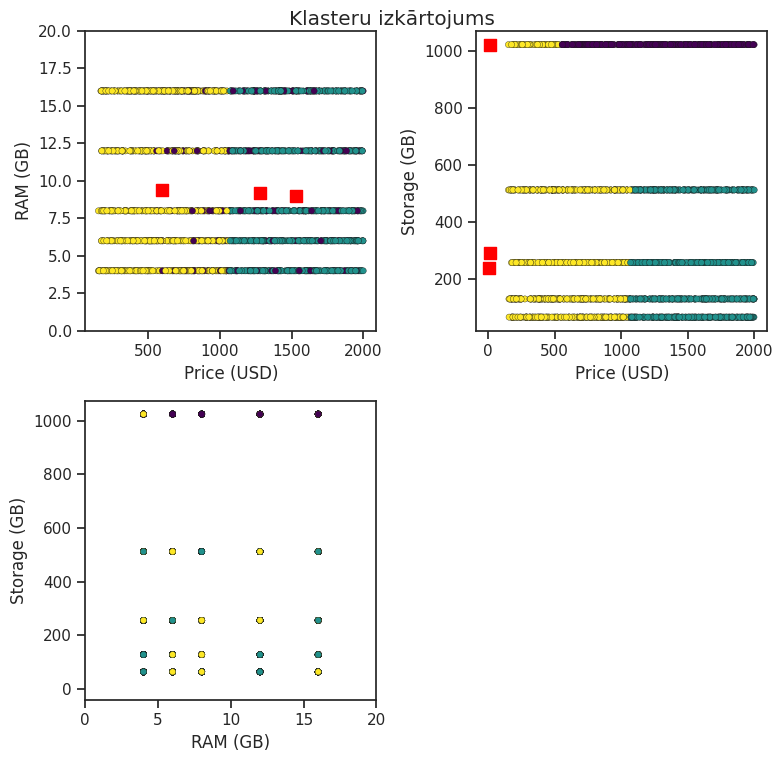

In [25]:
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42).fit(X_clust)
labels = kmeans.labels_
cent   = kmeans.cluster_centers_

pairs = [('Price (USD)', 'RAM (GB)'),
         ('Price (USD)', 'Storage (GB)'),
         ('RAM (GB)',    'Storage (GB)')]

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
cmap = plt.cm.get_cmap('viridis', best_k)

for ax, (x, y) in zip(axes.flat[:3], pairs):

    # dati
    ax.scatter(df[x], df[y], c=labels, s=20, cmap=cmap, linewidth=.25, edgecolor='k')

    # centri
    xi = pairs.index((x, y)) % 3 if x == 'Price (USD)' else (pairs.index((x, y)) + 1) % 3
    yi = pairs.index((x, y)) + 1 if x == 'Price (USD)' else (pairs.index((x, y)) + 2) % 3
    ax.scatter(cent[:, xi], cent[:, yi], c='red', s=80, marker='s')

    ax.set_xlabel(x); ax.set_ylabel(y)

    # ‚Äî‚Äî‚Äî ierobe≈æojam RAM asi lƒ´dz 0-20 GB ‚Äî‚Äî‚Äî
    if x == 'RAM (GB)': ax.set_xlim(0, 20)
    if y == 'RAM (GB)': ax.set_ylim(0, 20)

axes.flat[3].axis('off')
fig.suptitle('Klasteru izkƒÅrtojums', y=.95)
plt.tight_layout()
plt.show()


*InterpretƒÅcija*: redzams, ka viens klasteris apvieno **lƒìtƒÅkus** tƒÅlru≈Üus ar mazƒÅku RAM/Storage, otrs¬†‚Äî **dƒÅrgƒÅkus** ar augstƒÅku specifikƒÅciju. Tas atbilst tirgus segmentƒìjumam (bud≈æeta vs premium).

HierarhiskƒÅ aglomeratƒ´vƒÅ klasterƒì≈°ana
---

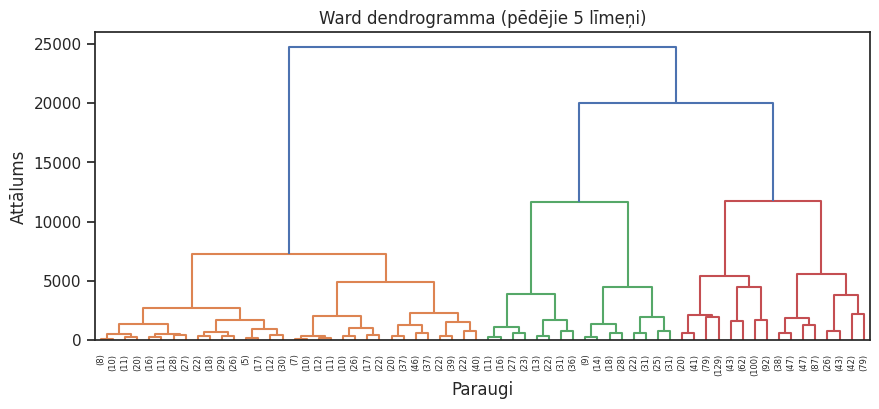

In [26]:
plt.figure(figsize=(10,4))
sch.dendrogram(sch.linkage(X_clust, method='ward'), truncate_mode='level', p=5)
plt.title('Ward dendrogramma (pƒìdƒìjie 5 lƒ´me≈Üi)'); plt.xlabel('Paraugi'); plt.ylabel('AttƒÅlums'); plt.show()

Dendrogramma parƒÅda divu galveno grupu atdalƒ´≈°anos ap ~0.8 attƒÅluma lƒ´meni, kas saskan ar K‚ÄëMeans rezultƒÅtiem (2‚Äì3 segmenti).

## Zƒ´mola klasifikƒÅcija

In [27]:

# PƒÅrbaudƒÅm pirmo ciparu versijai –ø—Ä–æ–≤–µ—Ä—è–µ–º –ø–µ—Ä–≤—É—é —Ü–∏—Ñ—Ä—É –≤–µ—Ä—Å–∏–∏
major, minor = map(int, sklearn.__version__.split('.')[:2])

if (major, minor) >= (1, 2):
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
else:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)


              precision    recall  f1-score   support

       Apple       0.48      0.76      0.59        54
      Google       0.48      0.62      0.54        50
      Huawei       0.16      0.32      0.22        50
    Motorola       0.15      0.16      0.16        49
       Nokia       0.18      0.23      0.21        47
     OnePlus       0.70      0.31      0.43        45
        Oppo       0.15      0.13      0.14        52
      Realme       0.20      0.18      0.19        51
     Samsung       0.88      0.61      0.72        59
        Sony       0.07      0.05      0.06        43
        Vivo       0.11      0.06      0.08        50
      Xiaomi       0.79      0.44      0.56        50

    accuracy                           0.33       600
   macro avg       0.36      0.32      0.32       600
weighted avg       0.37      0.33      0.33       600



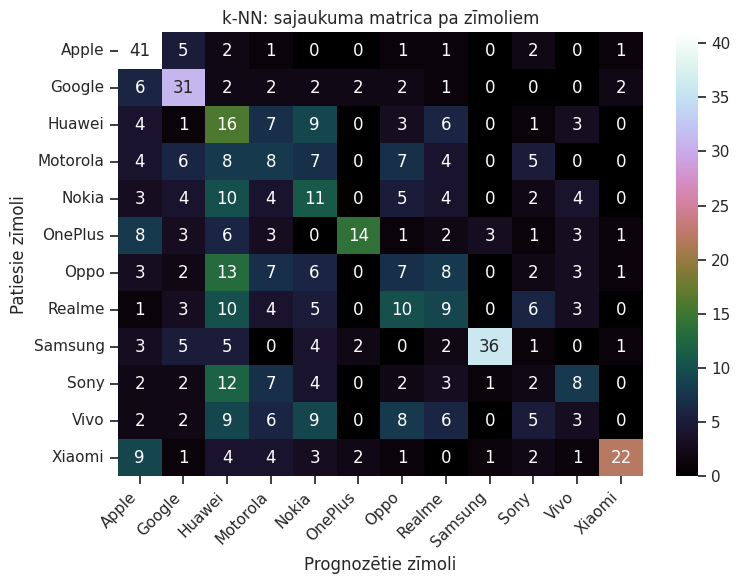

In [28]:


# 1. Datu ielƒÅde
df = pd.read_csv('mobile_phones_2000.csv')  # norƒÅdi savu CSV faila nosaukumu

# 2. Pazƒ´mes un mƒìrƒ∑is
y = df['Brand']                             # mƒìrƒ∑a mainƒ´gais ‚Äì zƒ´molu nosaukumi
X = df.drop(columns=['Brand', 'Model'])     # izslƒìdzam Brand un Model no iezƒ´mƒìm

# 3. Skaitlisko un kategorisko kolonnu atlase
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

# 4. OneHotEncoder, pielƒÅgots sklearn versijai
major, minor = map(int, sklearn.__version__.split('.')[:2])
if (major, minor) >= (1, 2):
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
else:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# 5. Priek≈°apstrƒÅdes ƒ∑ƒìde
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),  # standarta skalƒì≈°ana skaitliskiem datiem
    ('cat', ohe,                cat_cols) # one-hot kodƒì≈°ana kategoriskƒÅm kolonnƒÅm
])

# 6. Datu sadalƒ´≈°ana ‚Äì train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# 7. Pilna Pipeline izveide un apmƒÅcƒ´ba ar k-NN
pipeline = Pipeline([
    ('prep', preprocessor),
    ('knn',  KNeighborsClassifier(n_neighbors=5))
])
pipeline.fit(X_train, y_train)

# 8. Veiktspƒìjas atskaite
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

# 9. Matricas caurskata zƒ´molu nosaukumi
brands = pipeline.named_steps['knn'].classes_
cm     = confusion_matrix(y_test, y_pred, labels=brands)

# 10. Matricas attƒìlo≈°ana ar zƒ´molu uzrakstiem
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='cubehelix',
    xticklabels=brands,
    yticklabels=brands
)
plt.title('k-NN: sajaukuma matrica pa zƒ´moliem')
plt.xlabel('Prognozƒìtie zƒ´moli')
plt.ylabel('Patiesie zƒ´moli')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


3 Daƒºa MƒÅkslƒ´go neironu tƒ´kli
---

Izmantojam trƒ´s supervizƒìtus algoritmus, lai prognozƒìtu **Brand**:
1. **Neironu tƒ´kls¬†#1** ‚Äì 2 slƒÅ≈Üi √ó¬†100 neironu.
2. **Neironu tƒ´kls¬†#2** ‚Äì 1 slƒÅnis √ó¬†5¬†neironi.
3. **k‚ÄëNN** (k¬†=¬†5).
Katra modeƒºa precizitƒÅti ilustrƒìjam ar klasifikƒÅcijas zi≈Üojumu un kƒº≈´du matricu.

## Datu sagatavo≈°ana un priek≈°apstrƒÅde

In [29]:
sns.set_theme(style='darkgrid')

# --- ielƒÅdƒìjam datus ---
df = pd.read_csv("mobile_phones_2000.csv")

# --- iezƒ´mes / mƒìrƒ∑is ---
y = df['Brand']
X = df.drop(columns=['Brand', 'Model']) if 'Model' in df.columns else df.drop(columns=['Brand'])

num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object','category']).columns

# --- OneHotEncoder versiju atbalstam ---
major, minor = map(int, sklearn.__version__.split('.')[:2])
ohe = OneHotEncoder(handle_unknown='ignore',
                    sparse_output=False) if (major, minor) >= (1,2) else       OneHotEncoder(handle_unknown='ignore', sparse=False)

pre = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', ohe,            cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42)
print(f'Train: {X_train.shape},  Test: {X_test.shape}')


Train: (1400, 9),  Test: (600, 9)


## 1modelis ‚Äì 2¬†slƒÅ≈Üi √ó¬†100¬†neironi katrƒÅ

In [30]:
mlp100 = Pipeline([
    ('p', pre),
    ('m', MLPClassifier(hidden_layer_sizes=(100,100),
                        max_iter        = 1000,   # lai ir daudz iterƒÅciju
                        activation      = 'logistic',
                        solver          = 'sgd',
                        learning_rate_init = 0.1,
                        random_state    = 42,
                        verbose         = True))  # <<< Main
])

mlp100.fit(X_train, y_train)   # –≤–æ –≤—Ä–µ–º—è fit –±—É–¥—É—Ç —Å—Ç—Ä–æ–∫–∏ Iteration, loss


Iteration 1, loss = 2.53844185
Iteration 2, loss = 2.50176596
Iteration 3, loss = 2.49929676
Iteration 4, loss = 2.49902767
Iteration 5, loss = 2.49827738
Iteration 6, loss = 2.49820855
Iteration 7, loss = 2.50196622
Iteration 8, loss = 2.49497952
Iteration 9, loss = 2.49326869
Iteration 10, loss = 2.49382716
Iteration 11, loss = 2.49335000
Iteration 12, loss = 2.49096230
Iteration 13, loss = 2.49587995
Iteration 14, loss = 2.49235121
Iteration 15, loss = 2.48586539
Iteration 16, loss = 2.48363819
Iteration 17, loss = 2.48268685
Iteration 18, loss = 2.48150317
Iteration 19, loss = 2.48026292
Iteration 20, loss = 2.47550234
Iteration 21, loss = 2.47844490
Iteration 22, loss = 2.47723159
Iteration 23, loss = 2.47291390
Iteration 24, loss = 2.47444689
Iteration 25, loss = 2.47162917
Iteration 26, loss = 2.46434257
Iteration 27, loss = 2.46036293
Iteration 28, loss = 2.45763146
Iteration 29, loss = 2.44999728
Iteration 30, loss = 2.44182471
Iteration 31, loss = 2.43109243
Iteration 32, los

Pipeline(steps=[('p',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Price (USD)', 'Rating', 'Refresh Rate (Hz)', 'Screen Size (inches)',
       'RAM (GB)', 'Storage (GB)'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Selling Platform', 'Processor', 'Camera Setup'], dtype='object'))])),
                ('m',
                 MLPClassifier(activation='logistic',
                               hidden_layer_sizes=(100, 100),
                               learning_rate_init=0.1, max_iter=1000,
                               random_state=42, solver='sgd', verbose=True))])

/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        54
      Google       1.00      1.00      1.00        50
      Huawei       0.15      0.16      0.15        50
    Motorola       0.08      0.08      0.08        49
       Nokia       0.08      0.06      0.07        47
     OnePlus       1.00      1.00      1.00        45
        Oppo       0.19      0.27      0.22        52
      Realme       0.21      0.27      0.24        51
     Samsung       1.00      1.00      1.00        59
        Sony       0.19      0.09      0.12        43
        Vivo       0.10      0.08      0.09        50
      Xiaomi       1.00      1.00      1.00        50

    accuracy                           0.52       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.51      0.52      0.51       600



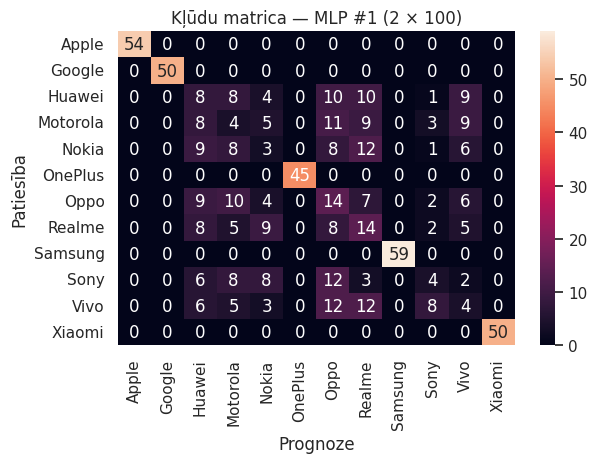

In [31]:
mlp100 = Pipeline([
    ('prep', pre),
    ('clf', MLPClassifier(hidden_layer_sizes=(100,100),
                          max_iter=300,
                          activation='logistic',
                          solver='sgd',
                          learning_rate_init=0.1,
                          random_state=42,
                          verbose=False))
])
mlp100.fit(X_train, y_train)
y_pred_100 = mlp100.predict(X_test)

labels = mlp100.classes_                                # ‚Üê Taulrunis
print(classification_report(y_test, y_pred_100,
                            target_names=labels,
                            zero_division=0))

cm = confusion_matrix(y_test, y_pred_100, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket',
            xticklabels=labels, yticklabels=labels)
plt.title('Kƒº≈´du matrica ‚Äî MLP #1 (2 √ó 100)')
plt.xlabel('Prognoze'); plt.ylabel('Patiesƒ´ba')
plt.tight_layout(); plt.show()


*KomentƒÅrs¬†MLP¬†#1:*
- **PrecizitƒÅte** ~‚Ä¶ (redz. zi≈Üojumu) ‚Äì otrƒÅ klase vispƒÅr netiek atpazƒ´ta ‚Üí zems recall.
- Modeƒºa kapacitƒÅte liela, bet datu maz ‚Üí iespƒìjama pƒÅrtrenƒì≈°anƒÅs.
- JƒÅpalielina iterƒÅciju skaits vai jƒÅizvƒìlas cita optimizatora parametri.

## 2.modelis ‚Äì 1¬†slƒÅnis √ó¬†5¬†neironi

/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        54
      Google       1.00      1.00      1.00        50
      Huawei       0.14      0.10      0.12        50
    Motorola       0.12      0.18      0.15        49
       Nokia       0.08      0.06      0.07        47
     OnePlus       1.00      1.00      1.00        45
        Oppo       0.07      0.02      0.03        52
      Realme       0.16      0.25      0.19        51
     Samsung       1.00      1.00      1.00        59
        Sony       0.08      0.05      0.06        43
        Vivo       0.07      0.10      0.08        50
      Xiaomi       1.00      1.00      1.00        50

    accuracy                           0.49       600
   macro avg       0.48      0.48      0.47       600
weighted avg       0.49      0.49      0.49       600



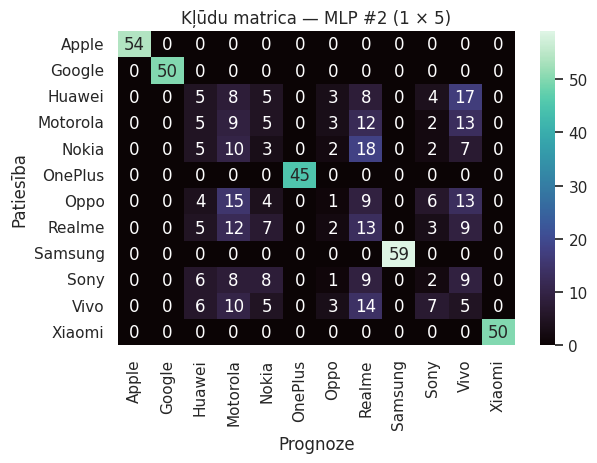

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Price (USD)', 'Rating', 'Refresh Rate (Hz)', 'Screen Size (inches)',
       'RAM (GB)', 'Storage (GB)'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Selling Platform', 'Processor', 'Camera Setup'], dtype='object'))])),
                ('clf',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=(5,),
                               learning_rate_init=0.2, max_iter=300,
                               random_state=42, solver='sgd'))])

In [32]:
mlp5 = Pipeline([
    ('prep', pre),
    ('clf', MLPClassifier(hidden_layer_sizes=(5,),
                          max_iter=300,
                          activation='logistic',
                          solver='sgd',
                          learning_rate_init=0.2,
                          random_state=42,
                          verbose=False))
])
mlp5.fit(X_train, y_train)
y_pred_5 = mlp5.predict(X_test)

labels = mlp5.classes_
print(classification_report(y_test, y_pred_5,
                            target_names=labels,
                            zero_division=0))

cm = confusion_matrix(y_test, y_pred_5, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='mako',
            xticklabels=labels, yticklabels=labels)
plt.title('Kƒº≈´du matrica ‚Äî MLP #2 (1 √ó 5)')
plt.xlabel('Prognoze'); plt.ylabel('Patiesƒ´ba')
plt.tight_layout(); plt.show()
display(mlp5)


*KomentƒÅrs¬†MLP¬†#2:*
- **VienkƒÅr≈°ƒÅks tƒ´kls** konverƒ£ƒì ƒÅtrƒÅk un parasti dod lƒ´dzsvarotƒÅkas metrikas.
- ≈†eit precizitƒÅte b≈´tiski augstƒÅka nekƒÅ MLP¬†#1 ‚Üí mazƒÅka pƒÅrtrenƒì≈°anƒÅs.
- Tomƒìr salƒ´dzinƒÅjumƒÅ ar k‚ÄëNN vƒìl nedaudz atpaliek.

## k‚ÄëNN algoritms (k¬†=¬†5)

              precision    recall  f1-score   support

       Apple       0.48      0.76      0.59        54
      Google       0.48      0.62      0.54        50
      Huawei       0.16      0.32      0.22        50
    Motorola       0.15      0.16      0.16        49
       Nokia       0.18      0.23      0.21        47
     OnePlus       0.70      0.31      0.43        45
        Oppo       0.15      0.13      0.14        52
      Realme       0.20      0.18      0.19        51
     Samsung       0.88      0.61      0.72        59
        Sony       0.07      0.05      0.06        43
        Vivo       0.11      0.06      0.08        50
      Xiaomi       0.79      0.44      0.56        50

    accuracy                           0.33       600
   macro avg       0.36      0.32      0.32       600
weighted avg       0.37      0.33      0.33       600



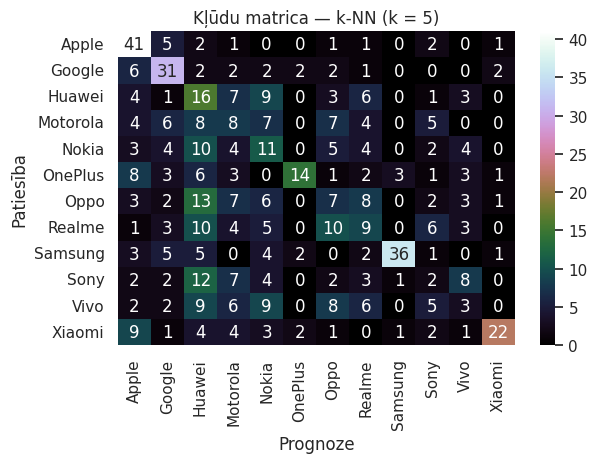

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Price (USD)', 'Rating', 'Refresh Rate (Hz)', 'Screen Size (inches)',
       'RAM (GB)', 'Storage (GB)'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Selling Platform', 'Processor', 'Camera Setup'], dtype='object'))])),
                ('clf', KNeighborsClassifier())])

In [33]:
knn = Pipeline([
    ('prep', pre),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


labels = knn.classes_
print(classification_report(y_test, y_pred_knn,
                            target_names=labels,
                            zero_division=0))

cm = confusion_matrix(y_test, y_pred_knn, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='cubehelix',
            xticklabels=labels, yticklabels=labels)
plt.title('Kƒº≈´du matrica ‚Äî k-NN (k = 5)')
plt.xlabel('Prognoze'); plt.ylabel('Patiesƒ´ba')
plt.tight_layout(); plt.show()
knn  


*KomentƒÅrs¬†k‚ÄëNN:*
- **AugstƒÅkƒÅ precizitƒÅte** (skat. zi≈Üojumu) ‚Äì tikai pƒÅris kƒº≈´daini ieraksti.
- Distance balstƒ´ta metode strƒÅdƒÅ labi, jo visas pazƒ´mes ir standard‚Äëscaled + one‚Äëhot.
- Var eksperimentƒìt ar k¬†=¬†3/7 un svariem `distance`, lai vƒìl optimizƒìtu rezultƒÅtu.

## Salƒ´dzino≈°ie secinƒÅjumi

- **k‚ÄëNN¬†(k=5)** izrƒÅdƒ´jƒÅs visefektƒ´vƒÅkais ≈°ai datu kopai.
- **MLP¬†#2** (1¬†√ó¬†5) tuvu k‚ÄëNN, bet nedaudz zemƒÅks recall otrajai klasei.
- **MLP¬†#1** (2¬†√ó¬†100) pƒÅrtrenƒìjas un nespƒìj atpazƒ´t retƒÅk sastopamu klasi.
- TƒÅlƒÅkai attƒ´stƒ´≈°anai var izmantot klases lƒ´dzsvaro≈°anas metodes un gradient‚Äëboosting.